In [17]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error

In [18]:
#reading the dataset
data=pd.read_csv('Onion Prices 2020.csv')
print(data)



                 state            district                         market  \
0       Andhra Pradesh             Kurnool                        Kurnool   
1       Andhra Pradesh             Kurnool                        Kurnool   
2       Andhra Pradesh             Kurnool                        Kurnool   
3       Andhra Pradesh             Kurnool                        Kurnool   
4       Andhra Pradesh             Kurnool                        Kurnool   
...                ...                 ...                            ...   
107290     West Bengal  Sounth 24 Parganas  Diamond Harbour(South 24-pgs)   
107291     West Bengal  Sounth 24 Parganas  Diamond Harbour(South 24-pgs)   
107292     West Bengal  Sounth 24 Parganas  Diamond Harbour(South 24-pgs)   
107293     West Bengal  Sounth 24 Parganas  Diamond Harbour(South 24-pgs)   
107294     West Bengal  Sounth 24 Parganas  Diamond Harbour(South 24-pgs)   

       commodity variety arrival_date  min_price  max_price  modal_price  


In [19]:
#checking for any null values
print (data.isnull().values.any())

False


In [20]:
#dropping the columns 

d1=data.drop(['variety','market'],axis=1)
print(d1.head(5))



            state district commodity arrival_date  min_price  max_price  \
0  Andhra Pradesh  Kurnool     Onion   03/01/2020       1350       4390   
1  Andhra Pradesh  Kurnool     Onion   04/01/2020       1390       4400   
2  Andhra Pradesh  Kurnool     Onion   06/01/2020       1460       5150   
3  Andhra Pradesh  Kurnool     Onion   07/01/2020       2010       5200   
4  Andhra Pradesh  Kurnool     Onion   10/01/2020       1320       4050   

   modal_price  
0       3100.0  
1       3200.0  
2       4310.0  
3       4200.0  
4       3300.0  


In [21]:
#spliting the date in day month and year in separte columns
d1[["day", "month", "year"]] = d1["arrival_date"].str.split("/", expand = True)
print("\nNew DataFrame:")
print(d1)


New DataFrame:
                 state            district commodity arrival_date  min_price  \
0       Andhra Pradesh             Kurnool     Onion   03/01/2020       1350   
1       Andhra Pradesh             Kurnool     Onion   04/01/2020       1390   
2       Andhra Pradesh             Kurnool     Onion   06/01/2020       1460   
3       Andhra Pradesh             Kurnool     Onion   07/01/2020       2010   
4       Andhra Pradesh             Kurnool     Onion   10/01/2020       1320   
...                ...                 ...       ...          ...        ...   
107290     West Bengal  Sounth 24 Parganas     Onion   03/09/2020       2200   
107291     West Bengal  Sounth 24 Parganas     Onion   04/09/2020       2050   
107292     West Bengal  Sounth 24 Parganas     Onion   08/09/2020       2700   
107293     West Bengal  Sounth 24 Parganas     Onion   09/09/2020       2625   
107294     West Bengal  Sounth 24 Parganas     Onion   10/09/2020       2800   

        max_price  moda

In [22]:
print(d1.head(5))

            state district commodity arrival_date  min_price  max_price  \
0  Andhra Pradesh  Kurnool     Onion   03/01/2020       1350       4390   
1  Andhra Pradesh  Kurnool     Onion   04/01/2020       1390       4400   
2  Andhra Pradesh  Kurnool     Onion   06/01/2020       1460       5150   
3  Andhra Pradesh  Kurnool     Onion   07/01/2020       2010       5200   
4  Andhra Pradesh  Kurnool     Onion   10/01/2020       1320       4050   

   modal_price day month  year  
0       3100.0  03    01  2020  
1       3200.0  04    01  2020  
2       4310.0  06    01  2020  
3       4200.0  07    01  2020  
4       3300.0  10    01  2020  


In [23]:
d2=d1.copy()

In [24]:
print(d2.head(5))

            state district commodity arrival_date  min_price  max_price  \
0  Andhra Pradesh  Kurnool     Onion   03/01/2020       1350       4390   
1  Andhra Pradesh  Kurnool     Onion   04/01/2020       1390       4400   
2  Andhra Pradesh  Kurnool     Onion   06/01/2020       1460       5150   
3  Andhra Pradesh  Kurnool     Onion   07/01/2020       2010       5200   
4  Andhra Pradesh  Kurnool     Onion   10/01/2020       1320       4050   

   modal_price day month  year  
0       3100.0  03    01  2020  
1       3200.0  04    01  2020  
2       4310.0  06    01  2020  
3       4200.0  07    01  2020  
4       3300.0  10    01  2020  


In [25]:
#droping the 
d3=d2.drop('arrival_date',axis=1)
print(d3.head(5))

            state district commodity  min_price  max_price  modal_price day  \
0  Andhra Pradesh  Kurnool     Onion       1350       4390       3100.0  03   
1  Andhra Pradesh  Kurnool     Onion       1390       4400       3200.0  04   
2  Andhra Pradesh  Kurnool     Onion       1460       5150       4310.0  06   
3  Andhra Pradesh  Kurnool     Onion       2010       5200       4200.0  07   
4  Andhra Pradesh  Kurnool     Onion       1320       4050       3300.0  10   

  month  year  
0    01  2020  
1    01  2020  
2    01  2020  
3    01  2020  
4    01  2020  


In [31]:

print(d3['state'].unique())
print(d3['district'].unique())



['Andhra Pradesh' 'Chattisgarh' 'Goa' 'Gujarat' 'Haryana'
 'Himachal Pradesh' 'Jammu and Kashmir' 'Jharkhand' 'Karnataka' 'Kerala'
 'Madhya Pradesh' 'Maharashtra' 'Nagaland' 'NCT of Delhi' 'Odisha'
 'Punjab' 'Rajasthan' 'Telangana' 'Tripura' 'Uttar Pradesh' 'Uttrakhand'
 'West Bengal']
['Kurnool' 'Bilaspur' 'Durg' 'Raigarh' 'Rajnandgaon' 'North Goa'
 'Ahmedabad' 'Amreli' 'Anand' 'Banaskanth' 'Bharuch' 'Bhavnagar' 'Dahod'
 'Jamnagar' 'Junagarh' 'Kheda' 'Mehsana' 'Navsari' 'Panchmahals'
 'Porbandar' 'Rajkot' 'Surat' 'Surendranagar' 'Vadodara(Baroda)' 'Ambala'
 'Bhiwani' 'Faridabad' 'Fatehabad' 'Gurgaon' 'Hissar' 'Jhajar' 'Jind'
 'Kaithal' 'Karnal' 'Kurukshetra' 'Mahendragarh-Narnaul' 'Mewat' 'Palwal'
 'Panchkula' 'Panipat' 'Rewari' 'Rohtak' 'Sirsa' 'Sonipat' 'Yamuna Nagar'
 'Chamba' 'Hamirpur' 'Kangra' 'Kullu' 'Mandi' 'Shimla' 'Sirmore' 'Solan'
 'Una' 'Anantnag' 'Jammu' 'Kathua' 'Rajouri' 'Srinagar' 'Udhampur'
 'Lohardaga' 'Ranchi' 'Bagalkot' 'Bangalore' 'Belgaum' 'Bellary' 'Bidar'
 'Bij

In [34]:

data['district'].value_counts()
data['state'].value_counts()

Uttar Pradesh        37263
Punjab               10783
Kerala                8834
West Bengal           7235
Odisha                6938
Haryana               6637
Rajasthan             4974
Maharashtra           4788
Madhya Pradesh        4333
Karnataka             3775
Gujarat               2940
Himachal Pradesh      2486
Uttrakhand            1731
Tripura               1626
Jammu and Kashmir      831
Chattisgarh            733
Telangana              507
NCT of Delhi           371
Jharkhand              302
Andhra Pradesh         127
Goa                     74
Nagaland                 7
Name: state, dtype: int64

In [43]:

one_hot_encoded_data = pd.get_dummies(d3, columns = ['state', 'district'])
print(one_hot_encoded_data)

       commodity  min_price  max_price  modal_price day month  year  \
107290     Onion       2200       2300       2250.0  03    09  2020   
107291     Onion       2050       2600       2200.0  04    09  2020   
107292     Onion       2700       2875       2800.0  08    09  2020   
107293     Onion       2625       2875       2800.0  09    09  2020   
107294     Onion       2800       2890       2870.0  10    09  2020   

        state_Andhra Pradesh  state_Chattisgarh  state_Goa  ...  \
107290                     0                  0          0  ...   
107291                     0                  0          0  ...   
107292                     0                  0          0  ...   
107293                     0                  0          0  ...   
107294                     0                  0          0  ...   

        district_Udhampur  district_Udupi  district_Ujjain  district_Una  \
107290                  0               0                0             0   
107291            

<AxesSubplot:xlabel='district'>

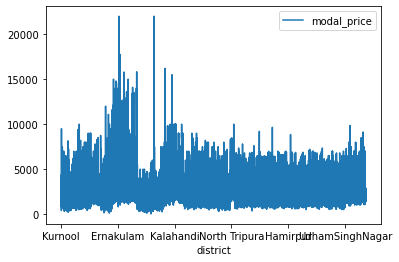

In [44]:
d3.plot("district", "modal_price")

<AxesSubplot:xlabel='district', ylabel='modal_price'>

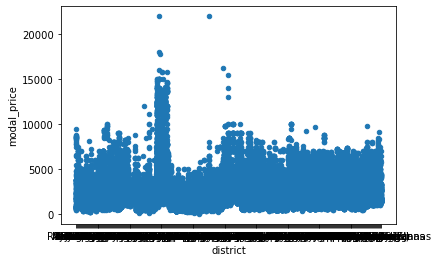

In [45]:
d3.plot.scatter("district", "modal_price")